# Final
## 1. Titanic (Regression)

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.shape, train_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


((891, 12), None)

In [5]:
test.shape, test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


((418, 11), None)

### 필요 없는 데이터 삭제
Name, Ticket은 생존 여부와 관계없다고 생각합니다. 그리고 Cabin은 누락된 데이터가 너무 많습니다.
따라서 Name, Ticket, Cabin을 삭제했습니다.

In [6]:
# 필요 없는 데이터 없애기
train_data.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True) 
test.drop(['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True) 

In [7]:
train_data.info()  # ['Age']에 누락된 데이터 = 177, ['Embarked']에 누락된 데이터 = 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [8]:
test.info()  # ['Age']에 누락된 데이터 = 86, ['Fare']에 누락된 데이터 = 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


### 누락된 데이터 채우기

In [9]:
train_data['Age'].mean()

29.69911764705882

In [10]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean()) # train_data['Age']의 누락된 데이터에 ['Age']평균 넣기

In [11]:
train_data['Embarked'].value_counts(dropna=False)  

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [12]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')  # rain_data['Embarked']의 누락된 데이터에 가장 많은 S 넣기 

In [13]:
test['Age'].mean()

30.272590361445783

In [14]:
test['Age'] = test['Age'].fillna(test['Age'].mean())  # test['Age']의 누락된 데이터에 ['Age']평균 넣기

In [15]:
test['Fare'].mean()

35.6271884892086

In [16]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())  # test['Fare']의 누락된 데이터에 ['Fare']평균 넣기

In [17]:
# object >> string
train_data['Sex'] = train_data['Sex'].astype(str)
train_data['Embarked'] = train_data['Embarked'].astype(str)
test['Sex'] = test['Sex'].astype(str)
test['Embarked'] = test['Embarked'].astype(str)

In [18]:
# 0과 1로 구성된 가변수로 만들기 
train_data = pd.get_dummies(train_data)
test = pd.get_dummies(test)

In [19]:
train_data.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    uint8  
 8   Sex_male     891 non-null    uint8  
 9   Embarked_C   891 non-null    uint8  
 10  Embarked_Q   891 non-null    uint8  
 11  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 53.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass    

In [20]:
from sklearn.ensemble import RandomForestClassifier # Random Forest 이용

In [21]:
X_train = train_data.drop(['Survived','PassengerId'], axis = 1) 
X_test = test.drop(['PassengerId'], axis = 1)
Y_train = train_data['Survived']

In [22]:
# model 생성
model = RandomForestClassifier(n_estimators=100, max_depth = 6, random_state = 0) # 트리의 개수 100개, 트리의 깊이 6개

In [23]:
model.fit(X_train, Y_train)
predicion = model.predict(X_test)
accuracy = round(model.score(X_train,Y_train)*100,2)
print("Accuracy:",accuracy,"%") # 정확도

Accuracy: 86.53 %


In [24]:
# csv 파일 생성
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predicion
})

submission.to_csv('submission(2019016002 양성윤).csv', index=False)

## 2.  Image classification with CNN

In [25]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [26]:
batch_size = 64

trainset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=True,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    trainset, 
    batch_size=batch_size,
    shuffle=True
)

testset = torchvision.datasets.CIFAR10(
    root='./data', 
    train=False,
    download=True, 
    transform=torchvision.transforms.ToTensor()
)
test_loader = torch.utils.data.DataLoader(
    testset, 
    batch_size=batch_size,
    shuffle=False
)

classes = trainset.classes
classes

Files already downloaded and verified
Files already downloaded and verified


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

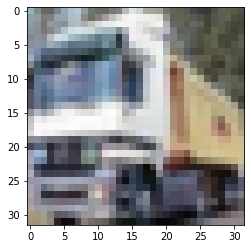

In [27]:
images=train_loader.dataset[1][0]
plt.imshow(images.permute(1, 2, 0))

In [28]:
images.size() # [3, 32, 32]: 3 -> RGB, 32x32 

torch.Size([3, 32, 32])

In [29]:
class cnn(nn.Module): 
    def __init__(self): 
        super(cnn, self).__init__() 
        self.conv1 = nn.Conv2d(in_channels= 3, out_channels= 6, kernel_size= 3, padding= 1) 
        self.conv2 = nn.Conv2d(in_channels= 6, out_channels= 10, kernel_size= 3, padding= 1)
        self.maxpool = nn.MaxPool2d(kernel_size= 2,stride= 2)
        self.conv3 = nn.Conv2d(in_channels= 10, out_channels= 16, kernel_size= 3, padding= 1)
        self.conv4 = nn.Conv2d(in_channels= 16, out_channels= 32, kernel_size= 3, padding= 1)
        self.maxpool = nn.MaxPool2d(kernel_size= 2,stride= 2)
        self.conv5 = nn.Conv2d(in_channels= 32, out_channels= 64, kernel_size= 3, padding= 1)
        self.conv6 = nn.Conv2d(in_channels= 64, out_channels= 80, kernel_size= 3, padding= 1)
        self.maxpool = nn.MaxPool2d(kernel_size= 2,stride= 2)
        self.dropout = nn.Dropout2d(0.4)
        self.fc1 = nn.Linear(4*4*80, 128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)

    # 순전파
    def forward(self, x):  # input = (32*32*3)
        x = nn.functional.relu(self.conv1(x))  # (32*32*6) 
        x = nn.functional.relu(self.conv2(x))  # (32*32*10) 
        x = self.maxpool(x)  # (16*16*10) 
        x = nn.functional.relu(self.conv3(x))  # (16*16*16) 
        x = nn.functional.relu(self.conv4(x))  # (16*16*32)  
        x = self.maxpool(x)  # (8*8*32) 
        x = nn.functional.relu(self.conv5(x))  # (8*8*64) 
        x = nn.functional.relu(self.conv6(x))  # (8*8*80) 
        x = self.maxpool(x) # (4*4*80) 

        x = torch.flatten(x,1)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [30]:
# GPU 연산 
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
model = cnn().to(DEVICE)  # 모델 생성

C:\Users\Administrator\anaconda3\lib\site-packages\torch\cuda\__init__.py:80: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [31]:
# loss, optimizer 설정 
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [32]:
# train
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (X, Y) in enumerate(train_loader):
        X, Y = X.to(DEVICE), Y.to(DEVICE, dtype = torch.int64)
        optimizer.zero_grad()
        y = model(X)
        loss = nn.functional.cross_entropy(y, Y)
        loss.backward()
        optimizer.step()

In [33]:
# evaluation
def evaluate(model, test_loader):
    model.eval()
    
    test_loss = 0
    correct = 0
    
    with torch.no_grad():
        for X, Y in test_loader:
            X, Y= X.to(DEVICE), Y.to(DEVICE, dtype = torch.int64)
            y = model(X)
            test_loss += nn.functional.cross_entropy(y, Y, reduction = "sum").item()
            prediction = y.max(1, keepdim = True)[1]   
            correct += prediction.eq(Y.view_as(prediction)).sum().item() 
    
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [34]:
# 정확도 측정
EPOCHS = 25
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("[EPOCH : {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(epoch, test_loss, test_accuracy))

[EPOCH : 1], 	Test Loss: 1.5725, 	Test Accuracy: 42.12 % 

[EPOCH : 2], 	Test Loss: 1.3457, 	Test Accuracy: 50.48 % 

[EPOCH : 3], 	Test Loss: 1.2731, 	Test Accuracy: 53.36 % 

[EPOCH : 4], 	Test Loss: 1.1933, 	Test Accuracy: 57.20 % 

[EPOCH : 5], 	Test Loss: 1.1521, 	Test Accuracy: 58.98 % 

[EPOCH : 6], 	Test Loss: 1.1409, 	Test Accuracy: 60.38 % 

[EPOCH : 7], 	Test Loss: 1.0624, 	Test Accuracy: 63.11 % 

[EPOCH : 8], 	Test Loss: 1.0469, 	Test Accuracy: 63.18 % 

[EPOCH : 9], 	Test Loss: 0.9978, 	Test Accuracy: 64.73 % 

[EPOCH : 10], 	Test Loss: 1.0063, 	Test Accuracy: 65.05 % 

[EPOCH : 11], 	Test Loss: 0.9670, 	Test Accuracy: 66.30 % 

[EPOCH : 12], 	Test Loss: 0.9731, 	Test Accuracy: 66.54 % 

[EPOCH : 13], 	Test Loss: 1.0068, 	Test Accuracy: 65.89 % 

[EPOCH : 14], 	Test Loss: 0.9846, 	Test Accuracy: 67.42 % 

[EPOCH : 15], 	Test Loss: 1.0367, 	Test Accuracy: 66.66 % 

[EPOCH : 16], 	Test Loss: 1.0590, 	Test Accuracy: 65.88 % 

[EPOCH : 17], 	Test Loss: 1.0815, 	Test Accuracy:

## 보고서
CNN을 이용하여 cifar10 이미지를 분류해봤습니다. cifar10 데이터를 불러오고 클래스를 이용하여 모델을 만들었습니다. convolution 레이어를 6개 쌓아 모델을 만들었습니다. relu 함수를 활성화 함수로 이용하였고 maxpooling 방법을 이용하여 pooling 레이어를 만들었습니다. 한 이미지 행렬의 차원은 (32, 32, 3)인데 convolution 레이어의 kernel size가 (3,3)이라 한 개의 convolution 레이어를 지날 때마다 (30,30, out_channel), (28,28, out_channel), (26,26, out_channel)처럼 2씩 줄어들게 되는데 이를 막기 위해 padding을 사용하여 (32, 32, out_channel)이 유지되게 하였습니다. 이미지가 레이어를 거치면 overfitting을 막기 위해 0.4의 값으로 dropout을 하였습니다. 이후 손실함수는 CrossEntropyLoss을 이용하고 Adam을 써서 최적화하였습니다. 모델을 train data를 이용해 훈련시키고 test data에 대해 정확도를 측정하였습니다. epoch가 클수록 정확도가 올라가는 것을 볼 수 있는데 epoch의 일정 구간마다 정확도가 낮아졌다가 높아지는 것을 볼 수 있었습니다. 이는 overfitting 문제이거나 logical minimum 문제라고 생각합니다. 또, 초기 값에 따라 정확도가 달라지는 것을 확인할 수 있었습니다. 정확도가 잘 나올 때는 70 초반까지 나왔습니다. 따라서 제가 생성한 모델에서 나올 수 있는 정확도는 60 중후반에서 70 초반이라고 생각합니다. 